In [1]:
from os import listdir
from os.path import isfile, join
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# creating list of all csv we have 
path_csv = 'csv_stock/'
all_csv = [f for f in listdir(path_csv) if isfile(join(path_csv, f))]
all_csv.sort()
print("We have total",len(all_csv)-1,"csv files")

We have total 5 csv files


In [3]:
# this function loads the csv files and extract 'index' and 'close' column and turn them into numpy array
def get_time_series_list_company_wise(all_csv):
    all_csv_list = list()
    for each_csv in all_csv:
        if each_csv.endswith('.csv'):
            each_csv_list = list()
            print(each_csv)
            data = pd.read_csv('csv_stock/{}'.format(each_csv))
            df_time = data[['index']]
            df_series = data[['Close']]
            time = df_time.to_numpy()
            series = df_series.to_numpy()
            each_csv_list.append(time)
            each_csv_list.append(series)
            print(len(each_csv_list))
            all_csv_list.append(each_csv_list)
    return all_csv_list

In [4]:
list_ts = get_time_series_list_company_wise(all_csv) 

aapl.csv
2
amzn.csv
2
fb.csv
2
googl.csv
2
msft.csv
2


In [5]:
time = list_ts[0][0]
series = list_ts[0][1]

print(series.shape)

(8364, 1)


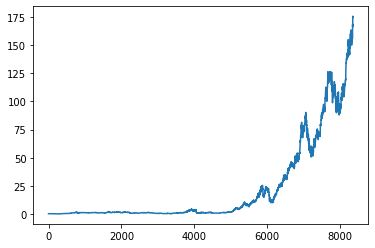

In [6]:
plt.plot(time,series)

In [7]:
# split into training and validation
split = 7390
time_train = time[4000:split]
time_val = time[split:]
series_train = series[4000:split]
series_val = series[split:]

print("Time Train: ", time_train.shape)
print("Series Train: ", series_train.shape)
print("Time Validation: ", time_val.shape)
print("Series Validation: ", series_val.shape)

Time Train:  (3390, 1)
Series Train:  (3390, 1)
Time Validation:  (974, 1)
Series Validation:  (974, 1)


In [91]:
window_size = 36
batch_size = 32
shuffle_buffer_size = 1000



def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [9]:
# finding the best Learning Rate (lr)

# tf.keras.backend.clear_session()
# tf.random.set_seed(51)
# np.random.seed(51)

# tf.keras.backend.clear_session()
# dataset = windowed_dataset(series_train, window_size, batch_size, shuffle_buffer_size)

# model = tf.keras.models.Sequential([
#   tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
#                       input_shape=[None]),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
#   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
#   tf.keras.layers.Dense(1),
#   tf.keras.layers.Lambda(lambda x: x * 100.0)
# ])

# lr_schedule = tf.keras.callbacks.LearningRateScheduler(
#     lambda epoch: 1e-8 * 10**(epoch / 20))
# optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
# model.compile(loss=tf.keras.losses.Huber(),
#               optimizer=optimizer,
#               metrics=["mae"])

# history = model.fit(dataset, epochs=100, callbacks=[lr_schedule])

In [10]:
# plt.semilogx(history.history["lr"], history.history["loss"])
# plt.axis([1e-8, 1e-4, 0, 30])

In [121]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
tf.keras.backend.clear_session()


shuffle_buffer_size = 1000

dataset = windowed_dataset(series_train, window_size = 36, batch_size = 56, shuffle_buffer = shuffle_buffer_size)

model = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(40, return_sequences=True)),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(10)),
   tf.keras.layers.Dense(1),
   tf.keras.layers.Lambda(lambda x: x * 100.0)
])


model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9),metrics=["mae"])

history = model.fit(dataset,epochs=150)

Epoch 1/150
105/105 [==============================] - 6s 62ms/step - loss: 40.4549 - mae: 4.4959
Epoch 2/150
105/105 [==============================] - 7s 62ms/step - loss: 5.9475 - mae: 1.7506
Epoch 3/150
105/105 [==============================] - 7s 67ms/step - loss: 4.1602 - mae: 1.3538
Epoch 4/150
105/105 [==============================] - 7s 64ms/step - loss: 3.7548 - mae: 1.2882
Epoch 5/150
105/105 [==============================] - 7s 65ms/step - loss: 3.3508 - mae: 1.1543
Epoch 6/150
105/105 [==============================] - 7s 64ms/step - loss: 3.0998 - mae: 1.1140: 1s - loss: 2.361
Epoch 7/150
105/105 [==============================] - 7s 63ms/step - loss: 3.1018 - mae: 1.1392
Epoch 8/150
105/105 [==============================] - 7s 64ms/step - loss: 3.0469 - mae: 1.0888
Epoch 9/150
105/105 [==============================] - 7s 66ms/step - loss: 3.4095 - mae: 1.1595
Epoch 10/150
105/105 [==============================] - 7s 64ms/step - loss: 3.0878 - mae: 1.1332
Epoch 11/1

105/105 [==============================] - 7s 62ms/step - loss: 1.3142 - mae: 0.7058
Epoch 84/150
105/105 [==============================] - 7s 63ms/step - loss: 1.4171 - mae: 0.7602
Epoch 85/150
105/105 [==============================] - 7s 62ms/step - loss: 1.6227 - mae: 0.8662
Epoch 86/150
105/105 [==============================] - 7s 63ms/step - loss: 1.2885 - mae: 0.7139
Epoch 87/150
105/105 [==============================] - 7s 63ms/step - loss: 1.2067 - mae: 0.6795
Epoch 88/150
105/105 [==============================] - 7s 63ms/step - loss: 1.2612 - mae: 0.7069
Epoch 89/150
105/105 [==============================] - 7s 67ms/step - loss: 1.2970 - mae: 0.6914
Epoch 90/150
105/105 [==============================] - 7s 63ms/step - loss: 1.3491 - mae: 0.7647
Epoch 91/150
105/105 [==============================] - 7s 62ms/step - loss: 1.1751 - mae: 0.6724
Epoch 92/150
105/105 [==============================] - 7s 63ms/step - loss: 1.3647 - mae: 0.7641
Epoch 93/150
105/105 [===========

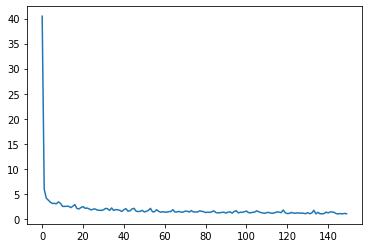

In [122]:
loss=history.history['loss']
epochs=range(len(loss))


loss_zoom = loss[50:]
epochs_zoom = epochs[50:]

plt.plot(epochs,loss)

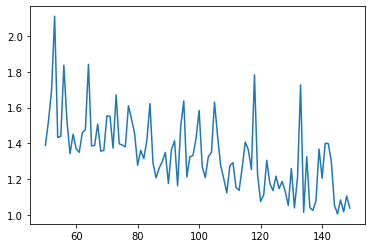

In [123]:
plt.plot(epochs_zoom,loss_zoom)

In [124]:
forecast = []
results = []
for time in range(len(series) - window_size):
    print(time, time + window_size)
    forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast_val = forecast[split-window_size:]
results_val = np.array(forecast_val)[:, 0, 0]

0 36
1 37
2 38
3 39
4 40
5 41
6 42
7 43
8 44
9 45
10 46
11 47
12 48
13 49
14 50
15 51
16 52
17 53
18 54
19 55
20 56
21 57
22 58
23 59
24 60
25 61
26 62
27 63
28 64
29 65
30 66
31 67
32 68
33 69
34 70
35 71
36 72
37 73
38 74
39 75
40 76
41 77
42 78
43 79
44 80
45 81
46 82
47 83
48 84
49 85
50 86
51 87
52 88
53 89
54 90
55 91
56 92
57 93
58 94
59 95
60 96
61 97
62 98
63 99
64 100
65 101
66 102
67 103
68 104
69 105
70 106
71 107
72 108
73 109
74 110
75 111
76 112
77 113
78 114
79 115
80 116
81 117
82 118
83 119
84 120
85 121
86 122
87 123
88 124
89 125
90 126
91 127
92 128
93 129
94 130
95 131
96 132
97 133
98 134
99 135
100 136
101 137
102 138
103 139
104 140
105 141
106 142
107 143
108 144
109 145
110 146
111 147
112 148
113 149
114 150
115 151
116 152
117 153
118 154
119 155
120 156
121 157
122 158
123 159
124 160
125 161
126 162
127 163
128 164
129 165
130 166
131 167
132 168
133 169
134 170
135 171
136 172
137 173
138 174
139 175
140 176
141 177
142 178
143 179
144 180
145 181
146 18

1039 1075
1040 1076
1041 1077
1042 1078
1043 1079
1044 1080
1045 1081
1046 1082
1047 1083
1048 1084
1049 1085
1050 1086
1051 1087
1052 1088
1053 1089
1054 1090
1055 1091
1056 1092
1057 1093
1058 1094
1059 1095
1060 1096
1061 1097
1062 1098
1063 1099
1064 1100
1065 1101
1066 1102
1067 1103
1068 1104
1069 1105
1070 1106
1071 1107
1072 1108
1073 1109
1074 1110
1075 1111
1076 1112
1077 1113
1078 1114
1079 1115
1080 1116
1081 1117
1082 1118
1083 1119
1084 1120
1085 1121
1086 1122
1087 1123
1088 1124
1089 1125
1090 1126
1091 1127
1092 1128
1093 1129
1094 1130
1095 1131
1096 1132
1097 1133
1098 1134
1099 1135
1100 1136
1101 1137
1102 1138
1103 1139
1104 1140
1105 1141
1106 1142
1107 1143
1108 1144
1109 1145
1110 1146
1111 1147
1112 1148
1113 1149
1114 1150
1115 1151
1116 1152
1117 1153
1118 1154
1119 1155
1120 1156
1121 1157
1122 1158
1123 1159
1124 1160
1125 1161
1126 1162
1127 1163
1128 1164
1129 1165
1130 1166
1131 1167
1132 1168
1133 1169
1134 1170
1135 1171
1136 1172
1137 1173
1138 1174


1862 1898
1863 1899
1864 1900
1865 1901
1866 1902
1867 1903
1868 1904
1869 1905
1870 1906
1871 1907
1872 1908
1873 1909
1874 1910
1875 1911
1876 1912
1877 1913
1878 1914
1879 1915
1880 1916
1881 1917
1882 1918
1883 1919
1884 1920
1885 1921
1886 1922
1887 1923
1888 1924
1889 1925
1890 1926
1891 1927
1892 1928
1893 1929
1894 1930
1895 1931
1896 1932
1897 1933
1898 1934
1899 1935
1900 1936
1901 1937
1902 1938
1903 1939
1904 1940
1905 1941
1906 1942
1907 1943
1908 1944
1909 1945
1910 1946
1911 1947
1912 1948
1913 1949
1914 1950
1915 1951
1916 1952
1917 1953
1918 1954
1919 1955
1920 1956
1921 1957
1922 1958
1923 1959
1924 1960
1925 1961
1926 1962
1927 1963
1928 1964
1929 1965
1930 1966
1931 1967
1932 1968
1933 1969
1934 1970
1935 1971
1936 1972
1937 1973
1938 1974
1939 1975
1940 1976
1941 1977
1942 1978
1943 1979
1944 1980
1945 1981
1946 1982
1947 1983
1948 1984
1949 1985
1950 1986
1951 1987
1952 1988
1953 1989
1954 1990
1955 1991
1956 1992
1957 1993
1958 1994
1959 1995
1960 1996
1961 1997


2683 2719
2684 2720
2685 2721
2686 2722
2687 2723
2688 2724
2689 2725
2690 2726
2691 2727
2692 2728
2693 2729
2694 2730
2695 2731
2696 2732
2697 2733
2698 2734
2699 2735
2700 2736
2701 2737
2702 2738
2703 2739
2704 2740
2705 2741
2706 2742
2707 2743
2708 2744
2709 2745
2710 2746
2711 2747
2712 2748
2713 2749
2714 2750
2715 2751
2716 2752
2717 2753
2718 2754
2719 2755
2720 2756
2721 2757
2722 2758
2723 2759
2724 2760
2725 2761
2726 2762
2727 2763
2728 2764
2729 2765
2730 2766
2731 2767
2732 2768
2733 2769
2734 2770
2735 2771
2736 2772
2737 2773
2738 2774
2739 2775
2740 2776
2741 2777
2742 2778
2743 2779
2744 2780
2745 2781
2746 2782
2747 2783
2748 2784
2749 2785
2750 2786
2751 2787
2752 2788
2753 2789
2754 2790
2755 2791
2756 2792
2757 2793
2758 2794
2759 2795
2760 2796
2761 2797
2762 2798
2763 2799
2764 2800
2765 2801
2766 2802
2767 2803
2768 2804
2769 2805
2770 2806
2771 2807
2772 2808
2773 2809
2774 2810
2775 2811
2776 2812
2777 2813
2778 2814
2779 2815
2780 2816
2781 2817
2782 2818


3506 3542
3507 3543
3508 3544
3509 3545
3510 3546
3511 3547
3512 3548
3513 3549
3514 3550
3515 3551
3516 3552
3517 3553
3518 3554
3519 3555
3520 3556
3521 3557
3522 3558
3523 3559
3524 3560
3525 3561
3526 3562
3527 3563
3528 3564
3529 3565
3530 3566
3531 3567
3532 3568
3533 3569
3534 3570
3535 3571
3536 3572
3537 3573
3538 3574
3539 3575
3540 3576
3541 3577
3542 3578
3543 3579
3544 3580
3545 3581
3546 3582
3547 3583
3548 3584
3549 3585
3550 3586
3551 3587
3552 3588
3553 3589
3554 3590
3555 3591
3556 3592
3557 3593
3558 3594
3559 3595
3560 3596
3561 3597
3562 3598
3563 3599
3564 3600
3565 3601
3566 3602
3567 3603
3568 3604
3569 3605
3570 3606
3571 3607
3572 3608
3573 3609
3574 3610
3575 3611
3576 3612
3577 3613
3578 3614
3579 3615
3580 3616
3581 3617
3582 3618
3583 3619
3584 3620
3585 3621
3586 3622
3587 3623
3588 3624
3589 3625
3590 3626
3591 3627
3592 3628
3593 3629
3594 3630
3595 3631
3596 3632
3597 3633
3598 3634
3599 3635
3600 3636
3601 3637
3602 3638
3603 3639
3604 3640
3605 3641


4326 4362
4327 4363
4328 4364
4329 4365
4330 4366
4331 4367
4332 4368
4333 4369
4334 4370
4335 4371
4336 4372
4337 4373
4338 4374
4339 4375
4340 4376
4341 4377
4342 4378
4343 4379
4344 4380
4345 4381
4346 4382
4347 4383
4348 4384
4349 4385
4350 4386
4351 4387
4352 4388
4353 4389
4354 4390
4355 4391
4356 4392
4357 4393
4358 4394
4359 4395
4360 4396
4361 4397
4362 4398
4363 4399
4364 4400
4365 4401
4366 4402
4367 4403
4368 4404
4369 4405
4370 4406
4371 4407
4372 4408
4373 4409
4374 4410
4375 4411
4376 4412
4377 4413
4378 4414
4379 4415
4380 4416
4381 4417
4382 4418
4383 4419
4384 4420
4385 4421
4386 4422
4387 4423
4388 4424
4389 4425
4390 4426
4391 4427
4392 4428
4393 4429
4394 4430
4395 4431
4396 4432
4397 4433
4398 4434
4399 4435
4400 4436
4401 4437
4402 4438
4403 4439
4404 4440
4405 4441
4406 4442
4407 4443
4408 4444
4409 4445
4410 4446
4411 4447
4412 4448
4413 4449
4414 4450
4415 4451
4416 4452
4417 4453
4418 4454
4419 4455
4420 4456
4421 4457
4422 4458
4423 4459
4424 4460
4425 4461


5150 5186
5151 5187
5152 5188
5153 5189
5154 5190
5155 5191
5156 5192
5157 5193
5158 5194
5159 5195
5160 5196
5161 5197
5162 5198
5163 5199
5164 5200
5165 5201
5166 5202
5167 5203
5168 5204
5169 5205
5170 5206
5171 5207
5172 5208
5173 5209
5174 5210
5175 5211
5176 5212
5177 5213
5178 5214
5179 5215
5180 5216
5181 5217
5182 5218
5183 5219
5184 5220
5185 5221
5186 5222
5187 5223
5188 5224
5189 5225
5190 5226
5191 5227
5192 5228
5193 5229
5194 5230
5195 5231
5196 5232
5197 5233
5198 5234
5199 5235
5200 5236
5201 5237
5202 5238
5203 5239
5204 5240
5205 5241
5206 5242
5207 5243
5208 5244
5209 5245
5210 5246
5211 5247
5212 5248
5213 5249
5214 5250
5215 5251
5216 5252
5217 5253
5218 5254
5219 5255
5220 5256
5221 5257
5222 5258
5223 5259
5224 5260
5225 5261
5226 5262
5227 5263
5228 5264
5229 5265
5230 5266
5231 5267
5232 5268
5233 5269
5234 5270
5235 5271
5236 5272
5237 5273
5238 5274
5239 5275
5240 5276
5241 5277
5242 5278
5243 5279
5244 5280
5245 5281
5246 5282
5247 5283
5248 5284
5249 5285


5975 6011
5976 6012
5977 6013
5978 6014
5979 6015
5980 6016
5981 6017
5982 6018
5983 6019
5984 6020
5985 6021
5986 6022
5987 6023
5988 6024
5989 6025
5990 6026
5991 6027
5992 6028
5993 6029
5994 6030
5995 6031
5996 6032
5997 6033
5998 6034
5999 6035
6000 6036
6001 6037
6002 6038
6003 6039
6004 6040
6005 6041
6006 6042
6007 6043
6008 6044
6009 6045
6010 6046
6011 6047
6012 6048
6013 6049
6014 6050
6015 6051
6016 6052
6017 6053
6018 6054
6019 6055
6020 6056
6021 6057
6022 6058
6023 6059
6024 6060
6025 6061
6026 6062
6027 6063
6028 6064
6029 6065
6030 6066
6031 6067
6032 6068
6033 6069
6034 6070
6035 6071
6036 6072
6037 6073
6038 6074
6039 6075
6040 6076
6041 6077
6042 6078
6043 6079
6044 6080
6045 6081
6046 6082
6047 6083
6048 6084
6049 6085
6050 6086
6051 6087
6052 6088
6053 6089
6054 6090
6055 6091
6056 6092
6057 6093
6058 6094
6059 6095
6060 6096
6061 6097
6062 6098
6063 6099
6064 6100
6065 6101
6066 6102
6067 6103
6068 6104
6069 6105
6070 6106
6071 6107
6072 6108
6073 6109
6074 6110


6797 6833
6798 6834
6799 6835
6800 6836
6801 6837
6802 6838
6803 6839
6804 6840
6805 6841
6806 6842
6807 6843
6808 6844
6809 6845
6810 6846
6811 6847
6812 6848
6813 6849
6814 6850
6815 6851
6816 6852
6817 6853
6818 6854
6819 6855
6820 6856
6821 6857
6822 6858
6823 6859
6824 6860
6825 6861
6826 6862
6827 6863
6828 6864
6829 6865
6830 6866
6831 6867
6832 6868
6833 6869
6834 6870
6835 6871
6836 6872
6837 6873
6838 6874
6839 6875
6840 6876
6841 6877
6842 6878
6843 6879
6844 6880
6845 6881
6846 6882
6847 6883
6848 6884
6849 6885
6850 6886
6851 6887
6852 6888
6853 6889
6854 6890
6855 6891
6856 6892
6857 6893
6858 6894
6859 6895
6860 6896
6861 6897
6862 6898
6863 6899
6864 6900
6865 6901
6866 6902
6867 6903
6868 6904
6869 6905
6870 6906
6871 6907
6872 6908
6873 6909
6874 6910
6875 6911
6876 6912
6877 6913
6878 6914
6879 6915
6880 6916
6881 6917
6882 6918
6883 6919
6884 6920
6885 6921
6886 6922
6887 6923
6888 6924
6889 6925
6890 6926
6891 6927
6892 6928
6893 6929
6894 6930
6895 6931
6896 6932


7620 7656
7621 7657
7622 7658
7623 7659
7624 7660
7625 7661
7626 7662
7627 7663
7628 7664
7629 7665
7630 7666
7631 7667
7632 7668
7633 7669
7634 7670
7635 7671
7636 7672
7637 7673
7638 7674
7639 7675
7640 7676
7641 7677
7642 7678
7643 7679
7644 7680
7645 7681
7646 7682
7647 7683
7648 7684
7649 7685
7650 7686
7651 7687
7652 7688
7653 7689
7654 7690
7655 7691
7656 7692
7657 7693
7658 7694
7659 7695
7660 7696
7661 7697
7662 7698
7663 7699
7664 7700
7665 7701
7666 7702
7667 7703
7668 7704
7669 7705
7670 7706
7671 7707
7672 7708
7673 7709
7674 7710
7675 7711
7676 7712
7677 7713
7678 7714
7679 7715
7680 7716
7681 7717
7682 7718
7683 7719
7684 7720
7685 7721
7686 7722
7687 7723
7688 7724
7689 7725
7690 7726
7691 7727
7692 7728
7693 7729
7694 7730
7695 7731
7696 7732
7697 7733
7698 7734
7699 7735
7700 7736
7701 7737
7702 7738
7703 7739
7704 7740
7705 7741
7706 7742
7707 7743
7708 7744
7709 7745
7710 7746
7711 7747
7712 7748
7713 7749
7714 7750
7715 7751
7716 7752
7717 7753
7718 7754
7719 7755


In [125]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [126]:
a = split-window_size
print(a)
print(len(forecast))
print(len(forecast[split-window_size:]))
print(len(forecast) - len(forecast[split-window_size:]))


# print(len(forecast_val))
# print(results_val.shape)
start_train_point = 4000
forecast_train = forecast[start_train_point-window_size:split-window_size]
results_train = np.array(forecast_train)[:, 0, 0]

print(len(forecast))
print(len(forecast_val))
print(len(forecast_train))
print(results_train.shape)

7354
8328
974
7354
8328
974
3390
(3390,)


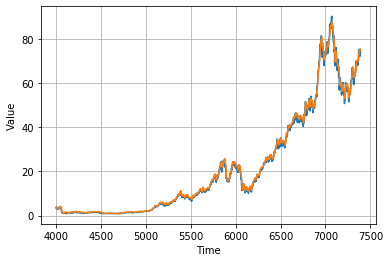

In [127]:
# whole training set graph (prediction)
plot_series(time_train, series_train)
plot_series(time_train, results_train)

(3390, 1)


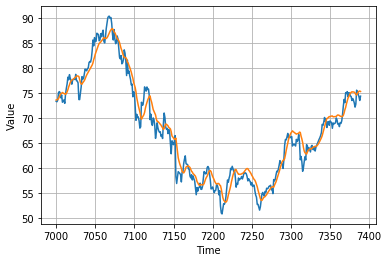

In [128]:
# partial training set graph (prediction)
partial = 3000
print(time_train.shape)
plot_series(time_train[partial:], series_train[partial:])
plot_series(time_train[partial:], results_train[partial:])

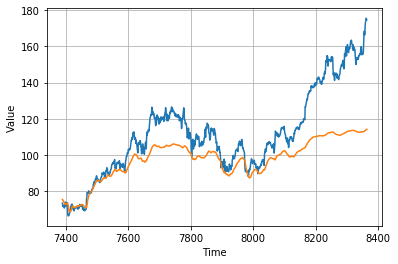

In [129]:
# validation data prediction
plot_series(time_val, series_val)
plot_series(time_val, results_val)

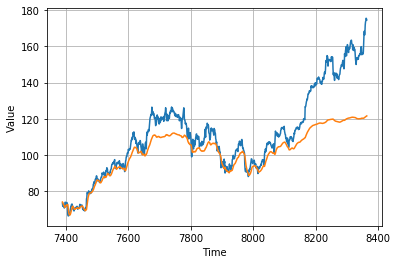

In [20]:
# validation data prediction(to check with previous one)

plot_series(time_val, series_val)
plot_series(time_val, results_val)